# K-means

This notebook covers the first part of the 7th exercise of the Machine Learning course at Coursera (the second part is about PCA).

It focuss on applying the K-means clustering algorithm in two situations: (1) a simple 2D dataset example to understand the algorithm mechanics, and (2) an image compression.

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Function the finds the closest centroid (Cluster Assignment)
# X: data matrix [num_samples x num_features]
# centroids: location of centroids [num_clusters x num_features]
#
# returns assigned_clusters: array of indexes of assigned clusters [num_samples x 1]
def find_closest_centroids(X, centroids):

    # init aux variables
    num_samples = X.shape[0] # m
    num_clusters = centroids.shape[0] # K
    assigned_clusters = np.zeros(num_samples) # indexes of assigned cluster (or centroid)
    
    # for each sample
    for s in range(num_samples):
        min_dist = 1000000 # large enough value to represent Inf
        
        # for each cluster
        for c in range(num_clusters):
            # compute the distance as |x-µ|^2
            dist = np.sum(np.power(X[s,:] - centroids[c,:], 2))
                            
            # keep if it is the minimum distance
            if dist < min_dist:
                min_dist = dist
                assigned_clusters[s] = c
    
    return assigned_clusters

In [19]:
# Function that computes the centroids (Centroid Moving)
# X: data matrix [num_samples x num_features]
# assigned_clusters: array of indexes of assigned clusters [num_samples x 1]
# num_clusters: number of clusters
#
# returns centroids: new location of centroids [num_clusters x num_features] 
def compute_centroids(X, assigned_clusters, num_clusters):
    
    # init aux variables
    num_features = X.shape[1]
    centroids = np.zeros((num_clusters, num_features))
    
    # for each cluster
    for c in range(num_clusters):
        # get those samples assigned to given cluster
        indices = np.where(assigned_clusters == c)
        
        # recompute the centroid of given cluster
        centroids[c,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [24]:
# Function that inits the centroids selecting k random samples of X
# X: data matrix [num_samples x num_features]
# num_clusters: number of clusters
#
# returns centroids: location of centroids [num_clusters x num_features] 
def init_centroids(X, num_clusters):
    
    # init aux variables
    num_samples, num_features = X.shape
    centroids = np.zeros((num_clusters, num_features))
    
    # select random samples (create an array of size num_clusters and random values between 0 and num_samples)
    random_indexes = np.random.randint(0, num_samples, num_clusters) 
    
    # for each cluster
    for i in range(num_clusters):
        # assign to the cluster the sample in one of the random indexes
        centroids[i,:] = X[random_indexes[i],:]
    
    return centroids

In [31]:
# Function that runs K-means
# X: data matrix [num_samples x num_features]
# initial_centroids: set of initial centroids
# num_iterations: number of iterations k-means will apply steps 1 and 2
#
# returns 
# - assigned_clusters: array of indexes of assigned clusters [num_samples x 1] 
# - centroids: location of centroids [num_clusters x num_features] 
def run_k_means(X, initial_centroids, num_iterations):
    
    # init variables
    num_samples, num_features = X.shape
    num_clusters = initial_centroids.shape[0]
    assigned_clusters = np.zeros(num_samples)
    centroids = initial_centroids
    
    # for each iteration
    for i in range(num_iterations):
        # Cluster assignment (step 1)
        assigned_clusters = find_closest_centroids(X, centroids)

        # Centroid Moving (step 2)
        centroids = compute_centroids(X, assigned_clusters, num_clusters)
    
    return assigned_clusters, centroids

In [27]:
# load data
data = loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

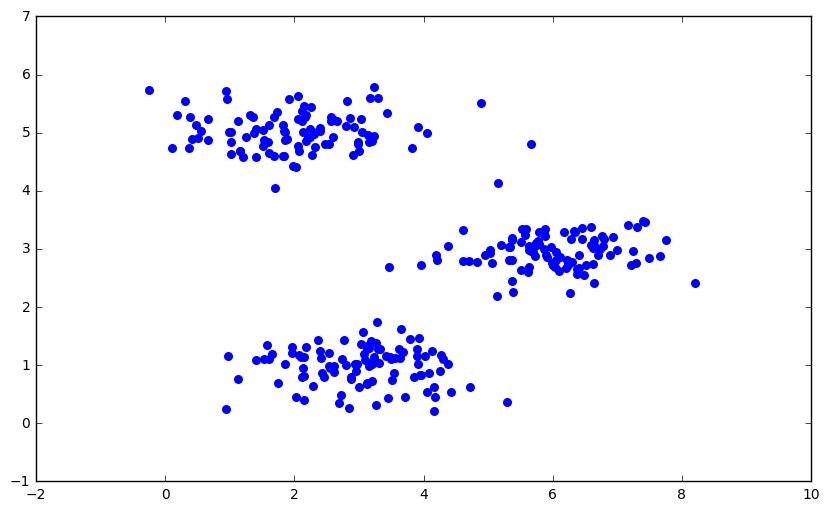

In [38]:
# plot data
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[:,0], X[:,1], s=30, color='b')

In [52]:
# init centroids
initial_centroids = init_centroids(X, 3);
print('initial_centroids\n', initial_centroids)

# Run K-means
assigned_clusters, final_centroids = run_k_means(X, initial_centroids, 5);
print('final_centroids\n', final_centroids)

initial_centroids
 [[ 3.63586049  1.12160194]
 [ 5.76634959  3.14271707]
 [ 2.09517296  1.14010491]]
final_centroids
 [[ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]
 [ 1.95399466  5.02557006]]


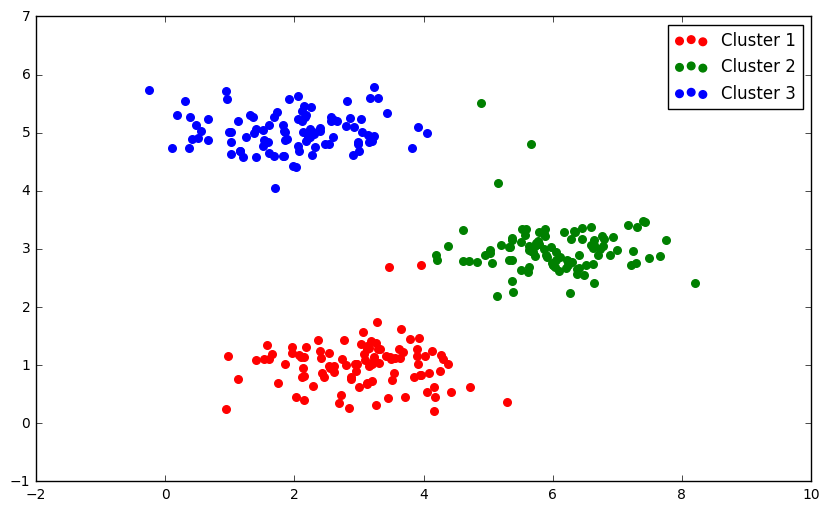

In [53]:
# plot data and clusters
cluster1 = X[np.where(assigned_clusters == 0)[0],:]
cluster2 = X[np.where(assigned_clusters == 1)[0],:]
cluster3 = X[np.where(assigned_clusters == 2)[0],:]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()